In [43]:

import cfar
import math
import matplotlib.pyplot as plt
import numpy as np
from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate

import glob
import sys
import cv2


In [44]:
paths = glob.glob("/media/nasir/Drive1/code/SAR/AutomatedSARShipDetection/python_cfar/SAR-Ship-Dataset/JPEGImages/*.jpg")


In [20]:
p = '/media/nasir/Drive1/code/SAR/AutomatedSARShipDetection/python_cfar/SAR-Ship-Dataset/JPEGImages/Gao_ship_hh_020170827830103608.jpg'

In [21]:
img = cv2.imread(p)

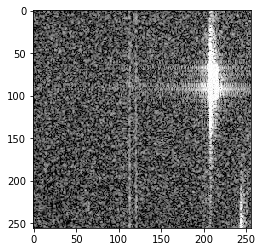

In [22]:
plt.imshow(img)

In [29]:
img2 = cv2.medianBlur(img, ksize=5)

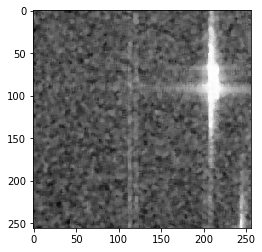

In [30]:
plt.imshow(img2)

In [36]:
b, g, r = cv2.split(img)
img3 = cv2.equalizeHist(r)
img2 = cv2.medianBlur(img3, ksize=5)
# green = cv2.equalizeHist(g)
# blue = cv2.equalizeHist(b)
# img3 = cv2.merge((blue, green, red))

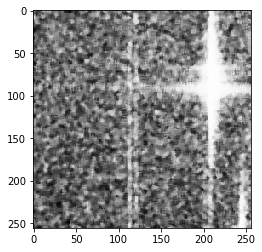

In [37]:
plt.imshow(img2, cmap='gray')

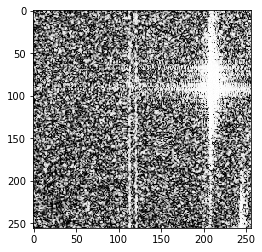

In [38]:
plt.imshow(img3, cmap='gray')

In [41]:
dst = cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)

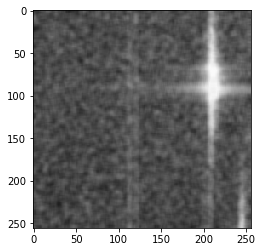

In [42]:
plt.imshow(dst, cmap='gray')

In [12]:
import random

In [116]:
r = random.sample(range(42000), 40)


In [118]:

for i in r:
    path = paths[i]
    dest = path.replace('JPEGImages', 'subset')
    box_file_src = path.replace('JPEGImages', 'ground-truth').replace('.jpg', '.txt')
    box_file_dest = path.replace('JPEGImages', 'gt-subset').replace('.jpg', '.txt')
#     gt_file = box_file.replace('detection-results', 'ground-truth')
    
    !cp {path} {dest}
    !cp {box_file_src} {box_file_dest}
    

In [7]:
CACFAR = cfar.ca_cfar


sys.stdout.write(f"\n")
sys.stdout.flush()

# for index in range(0, len(paths)):
for index in range(0, 12):
    path = paths[index]
    output_file = path.replace('JPEGImages', 'subset')
    box_file = path.replace('JPEGImages', 'detection-results').replace('.jpg', '.txt')
    gt_file = box_file.replace('detection-results', 'ground-truth')
    image = CACFAR(path, output_file, box_file, gt_file, 50, 40, 0.8)
    sys.stdout.write(f"\r {index} / {len(paths)}")
    sys.stdout.flush()

sys.stdout.write(f"\n\n")
sys.stdout.flush()
    


 11 / 43819

